In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs) 
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60_000, 28 * 28)).astype("float32") / 32
test_images = test_images.reshape((10_000, 28 * 28)).astype("float32") / 32
train_images, val_images = images[10_000:], images[:10_000]
train_labels, val_labels = labels[10_000:], labels[:10_000]

In [5]:
# Listing 7.19 - Using the `callback` argument in the `fit()` method`
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8994 - val_loss: 0.1828 - val_accuracy: 0.9581
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2516 - accuracy: 0.9464 - val_loss: 0.1502 - val_accuracy: 0.9697
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2270 - accuracy: 0.9541 - val_loss: 0.1784 - val_accuracy: 0.9718
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2169 - accuracy: 0.9591 - val_loss: 0.1668 - val_accuracy: 0.9731
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9640 - val_loss: 0.1753 - val_accuracy: 0.9727
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2048 - accuracy: 0.9644 - val_loss: 0.1741 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1889 - accuracy: 0.9676 - val_loss: 0.1916 - val_accuracy:

In [7]:
model = keras.models.load_model("checkpoint_path.keras")

In [9]:
# Listing 7.2 - Creating a custom callback by subclassing the `Callback` class
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_each_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4084 - accuracy: 0.8985 - val_loss: 0.1755 - val_accuracy: 0.9607
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9462 - val_loss: 0.1514 - val_accuracy: 0.9699
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2250 - accuracy: 0.9558 - val_loss: 0.1669 - val_accuracy: 0.9720
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2111 - accuracy: 0.9612 - val_loss: 0.1744 - val_accuracy: 0.9726
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2062 - accuracy: 0.9632 - val_loss: 0.1704 - val_accuracy: 0.9742
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2003 - accuracy: 0.9653 - val_loss: 0.1600 - val_accuracy: 0.9777
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2000 - accuracy: 0.9682 - val_loss: 0.1988 - val_accuracy:

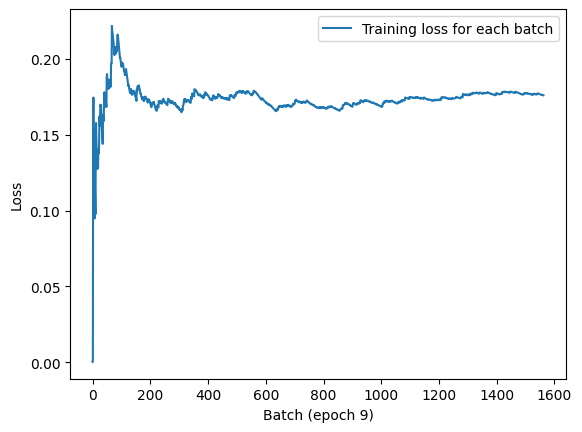

In [11]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))